<a href="https://colab.research.google.com/github/joimb9064/EAI_project_problems/blob/main/Q_Learning_Taxi_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing Libraries
This section imports necessary libraries including gym for creating the environment, numpy for numerical operations, pandas for data manipulation, and matplotlib for plotting. These libraries will support the implementation of the Q-learning algorithm and visualization of results.

In [ ]:
!apt-get install x11-utils
!apt-get install pyglet
!apt-get install -y xvfb python-openl
!apt-get install -y xvfb
!pip install gym pyvirtualdisplay
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1

!apt-get upgrade -y
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 318 kB of archives.
After this operation, 1,053 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files bash binutils binutils-common binutils-x86-64-linux-gnu bsdutils coreutils
  cuda-compat-12-2 cuda-keyring cuda-toolkit-12-config-common cuda-toolkit-config-common dpkg
  dpkg-dev e2fsprogs libbinutils libblkid1 libc-bin libctf-nobfd0 libctf0 libdpkg-perl libext2fs2
  libgnutls30 libldap-2.5-0 libmount1 libpam-modules libpam-modules-bin libpam-runtime libpam0g
  libperl5.34 libprocps8 libsmartcols1 libss2 libudev1 linux-libc-dev login logsave mount openssl
  passwd perl perl-base perl-modules-5.34 procps tar util-linux
45 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 60.4 MB of archives.
After this operation, 172 kB of additional disk space will be used.
Get:1 https://developer.download.nvidia.

This code initializes a reinforcement learning environment using the OpenAI Gym library. Here's a breakdown:

import gym: Imports the Gym library, which provides a range of environments for developing and testing reinforcement learning algorithms.

env = gym.make("Taxi-v3").env: Loads the "Taxi-v3" environment, a classic gridworld scenario where a taxi must pick up and drop off passengers at specific locations. Using .env gives access to the core environment object.

env.reset(): Resets the environment to its initial state and returns the starting observation or state. This prepares the environment for a new episode and allows the agent to start learning from a fresh state.

In [51]:
import gym
env = gym.make("Taxi-v3").env

env.reset()



469


This code imports key libraries for numerical operations, plotting, and interactive display:

NumPy (np): for efficient array and mathematical operations.
Matplotlib (plt): for creating visualizations like reward plots in training.
IPython Display (ipythondisplay): for updating plots in real time within Jupyter or Colab, useful for live visualization during training.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

**Random Policy Code**

the code implements a random policy. In reinforcement learning, a "random policy" means that the agent selects actions at random, without any learning or optimization strategy. Here, the agent takes actions in the Taxi-v3 environment by sampling randomly from the action space (action = env.action_space.sample()). This random approach provides a way to explore and observe the environment but does not lead to improved performance over time.



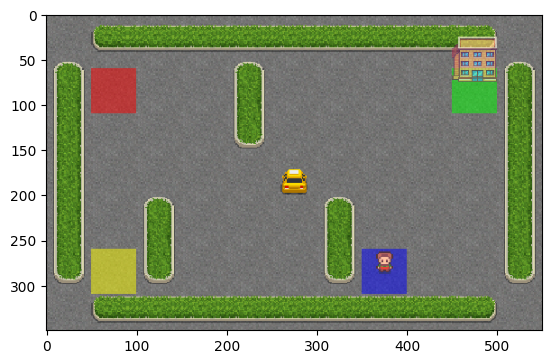

KeyboardInterrupt: 

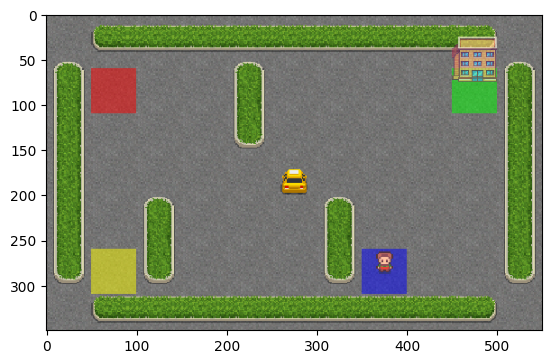

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for rendering
from IPython import display as ipythondisplay  # Importing IPython for display management
import gym  # Import gym for the environment
import time  # Import time to add a delay between frames

# Initialize the environment (replace with your desired environment, e.g., 'CartPole-v1')
env = gym.make('Taxi-v3')

# Reset the environment
env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment
for i in range(50):
    action = env.action_space.sample()  # Take a random action
    observation, reward, done, info = env.step(action)  # Step through the environment

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()





This code explores and configures the state and action spaces of the Taxi-v3 environment in OpenAI Gym. It displays the available actions and possible states, encodes a specific environment setup into a state integer, and then sets the environment to start in that custom state. This approach is useful for understanding the environment's structure and testing specific scenarios in reinforcement learning.

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state= env.encode(3,1,2,0)
print("State :", state)
env.s = state


Action Space Discrete(6)
State Space Discrete(500)
State : 328


In [ ]:
env.P[328]


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

This code tests a **random policy** in the Taxi-v3 environment. It starts by setting a specific initial state (328) and tracks each action the agent takes in a loop until the episode ends. With each step, the code:

Chooses a random action,
Records the resulting state, reward, and penalty count if the action is incorrect,
Adds each frame's details (state, action, reward, and penalties) to a list for potential playback.
Finally, it prints the total timesteps taken (epochs) and penalties incurred, providing a baseline performance metric for comparison with more advanced policies. This baseline helps highlight the limitations of a random approach in solving the environment.

In [ ]:
env.s = 328
epochs = 0

penalties, rewards = 0,0
frames =[]
done = False

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward,
          'penalties': penalties

      }
  )

  epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 195
Penalties incurred: 58


This code defines a function to display the progress of an agent in a reinforcement learning environment by iterating through and printing each frame of an episode. The function, print_frames(frames), takes a list of frames as input and sequentially clears and displays each frame with detailed information about:

The timestep number,
The agent's current state,
The action taken,
The reward received, and
The cumulative penalties incurred.


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")  # Display penalties
        sleep(1)  # Set delay to 1 second

print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 10
State: 153
Action: 4
Reward: -10
Penalties: 2


KeyboardInterrupt: 

This code provides a visual and detailed log of an agent’s random actions in the Taxi-v3 environment, helping users see how the agent interacts with the environment over time. It’s useful for observing the immediate impact of each action and understanding how the environment responds, even though the agent here follows a random policy.

In [ ]:
from IPython.display import clear_output
import gym
from time import sleep

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment and get the initial state
state = env.reset()

# Initialize a list to store frame information
frames = []
penalties = 0

# Loop through steps of the environment
for i in range(50):
    action = env.action_space.sample()  # Take a random action
    next_state, reward, done, info = env.step(action)  # Step through the environment

    # Track penalties
    if reward == -10:
        penalties += 1

    # Append frame information to the frames list, including next_state, done, and info
    frames.append({
        'frame': env.render(mode='ansi'),  # Render as text
        'state': state,
        'action': action,
        'reward': reward,
        'penalties': penalties,
        'next_state': next_state,
        'done': done,
        'info': info
    })

    # Update the state
    state = next_state

    # Break the loop if the episode is done
    if done:
        break

# Function to display the frames sequentially
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])  # Display the environment's current state as text
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")
        print(f"Next State: {frame['next_state']}, Reward: {frame['reward']}, Done: {frame['done']}, Info: {frame['info']}")
        sleep(5)  # Set delay to 1 second

# Output all frames sequentially with the print_frames function
print_frames(frames)

# Close the environment
env.close()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 4
State: 211
Action: 0
Reward: -1
Penalties: 1
Next State: 311, Reward: -1, Done: False, Info: {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)}


KeyboardInterrupt: 

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])



**Grid Search on what are the best hyperparameters**


This code performs a grid search to optimize Q-learning parameters (alpha, gamma, and epsilon) on the Taxi-v3 environment by minimizing average timesteps per episode. It runs the Q-learning algorithm for each parameter combination, tracks performance metrics (average timesteps and penalties), and outputs the best set of parameters based on the results. This approach helps find hyperparameters that make the learning process more efficient.


In [ ]:
import random
import numpy as np
from IPython.display import clear_output
import gym

# Hyperparameter grid for alpha, gamma, and epsilon
alpha_grid = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma_grid = [0.6, 0.7, 0.8, 0.9, 0.99]
epsilon_grid = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize the environment
env = gym.make('Taxi-v3')

# Function to run Q-learning with specific hyperparameters
def q_learning(alpha, gamma, epsilon, episodes=10000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_epochs, total_penalties = 0, 0

    for i in range(1, episodes + 1):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            next_state, reward, done, info = env.step(action)

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

            if reward == -10:  # Penalty for illegal moves
                penalties += 1

            state = next_state
            epochs += 1

        total_penalties += penalties
        total_epochs += epochs

    return total_epochs / episodes, total_penalties / episodes  # Average timesteps and penalties

# Grid search loop
best_params = None
best_score = float('inf')
results = []

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            print(f"Testing alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
            avg_epochs, avg_penalties = q_learning(alpha, gamma, epsilon)
            score = avg_epochs  # Define score as the average timesteps to solve episodes
            results.append((alpha, gamma, epsilon, score, avg_penalties))

            if score < best_score:
                best_score = score
                best_params = (alpha, gamma, epsilon)

# Display the best parameters and their score
print(f"Best parameters: alpha={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]} with score={best_score}")


Testing alpha=0.1, gamma=0.6, epsilon=0.1
Testing alpha=0.1, gamma=0.6, epsilon=0.2
Testing alpha=0.1, gamma=0.6, epsilon=0.3
Testing alpha=0.1, gamma=0.6, epsilon=0.4
Testing alpha=0.1, gamma=0.6, epsilon=0.5
Testing alpha=0.1, gamma=0.7, epsilon=0.1
Testing alpha=0.1, gamma=0.7, epsilon=0.2
Testing alpha=0.1, gamma=0.7, epsilon=0.3
Testing alpha=0.1, gamma=0.7, epsilon=0.4
Testing alpha=0.1, gamma=0.7, epsilon=0.5
Testing alpha=0.1, gamma=0.8, epsilon=0.1
Testing alpha=0.1, gamma=0.8, epsilon=0.2
Testing alpha=0.1, gamma=0.8, epsilon=0.3
Testing alpha=0.1, gamma=0.8, epsilon=0.4
Testing alpha=0.1, gamma=0.8, epsilon=0.5
Testing alpha=0.1, gamma=0.9, epsilon=0.1
Testing alpha=0.1, gamma=0.9, epsilon=0.2
Testing alpha=0.1, gamma=0.9, epsilon=0.3
Testing alpha=0.1, gamma=0.9, epsilon=0.4
Testing alpha=0.1, gamma=0.9, epsilon=0.5
Testing alpha=0.1, gamma=0.99, epsilon=0.1
Testing alpha=0.1, gamma=0.99, epsilon=0.2
Testing alpha=0.1, gamma=0.99, epsilon=0.3
Testing alpha=0.1, gamma=0.99, 

**Training the Agent using Q-Learning or Q tables**

This code implements a Q-learning algorithm for the Taxi-v3 environment, training an agent to navigate effectively. The Q-table is iteratively updated based on the rewards received, allowing the agent to learn an optimal policy through trial and error over 100,000 episodes. The agent’s exploration and exploitation are balanced using the epsilon-greedy strategy, while penalties track the agent's mistakes. Progress is printed every 100 episodes, and the entire training is timed for efficiency assessment.

In [ ]:
%%time
"""Training the agent using Q-learning"""
import random
import numpy as np
from IPython.display import clear_output
import gym

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration factor

# For plotting metrics
all_epochs = []
all_penalties = []

# Training loop
for i in range(1, 100001):
    state = env.reset()  # Reset the environment and get the initial state (no need to index)
    epochs, penalties, reward = 1, 1, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Print all the values returned by env.step()
        #print(f"Next State: {next_state}, Reward: {reward}, Done: {done}, Truncated: {truncated}, Info: {info}")

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties
        if reward == -10:
            penalties += 1

        # Move to the next state
        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.

CPU times: user 1min 7s, sys: 9.01 s, total: 1min 16s
Wall time: 1min 10s


**Evaluating the Agent**

This code evaluates a **Q-learning-trained agent’s** performance in the Taxi-v3 environment. It runs the agent through 100 episodes, tracking steps, penalties, and rewards for each episode. By calculating averages for steps and penalties and plotting cumulative rewards, the code provides insights into the agent's effectiveness and efficiency, indicating how well it has learned to navigate the environment. This evaluation phase is essential to verify the success of the agent's training.


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation parameters
total_epochs, total_penalties, total_rewards = 0, 0, []
episodes = 100

# Run evaluation
for _ in range(episodes):
    state = env.reset()  # Reset the environment
    epochs, penalties, episode_reward = 0, 0, 0
    done = False

    while not done:
        # Choose the best action based on Q-table
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)  # Take the action and observe the result

        # Track penalties
        if reward == -10:
            penalties += 1

        # Track total reward for this episode
        episode_reward += reward
        epochs += 1  # Count steps in the episode

    # Append episode reward for cumulative rewards plot
    total_rewards.append(episode_reward)
    total_penalties += penalties  # Total penalties across all episodes
    total_epochs += epochs  # Total steps across all episodes

# Calculate cumulative rewards
cumulative_rewards = [sum(total_rewards[:i+1]) for i in range(len(total_rewards))]

# Print evaluation results
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

# Plot cumulative rewards over evaluation episodes
plt.figure(figsize=(10, 5))
plt.plot(range(len(cumulative_rewards)), cumulative_rewards, color='green')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Evaluation Episodes')
plt.show()


ValueError: not enough values to unpack (expected 5, got 4)

**Train Agent and Save the data to Google Colab**

This code trains a **Q-learning agent** in the Taxi-v3 environment. The agent learns to take actions based on a Q-table, which is updated with a balance of exploration and exploitation. The training progress is visualized with plots, and the final Q-table is saved, allowing for analysis and further use.

Strømmer utdata som er avkortet til de siste 5000 linjene.
Episode: 5002, Total Reward: -44, Cumulative Reward: -495724, Steps: 20, Penalties: 5
Episode: 5003, Total Reward: 3, Cumulative Reward: -495721, Steps: 18, Penalties: 0
Episode: 5004, Total Reward: 0, Cumulative Reward: -495721, Steps: 21, Penalties: 0
Episode: 5005, Total Reward: -17, Cumulative Reward: -495738, Steps: 20, Penalties: 2
Episode: 5006, Total Reward: -90, Cumulative Reward: -495828, Steps: 48, Penalties: 7
Episode: 5007, Total Reward: -59, Cumulative Reward: -495887, Steps: 26, Penalties: 6
Episode: 5008, Total Reward: -11, Cumulative Reward: -495898, Steps: 14, Penalties: 2
Episode: 5009, Total Reward: -35, Cumulative Reward: -495933, Steps: 29, Penalties: 3
Episode: 5010, Total Reward: -58, Cumulative Reward: -495991, Steps: 34, Penalties: 5
Episode: 5011, Total Reward: -18, Cumulative Reward: -496009, Steps: 21, Penalties: 2
Episode: 5012, Total Reward: -89, Cumulative Reward: -496098, Steps: 47, Penalties: 7

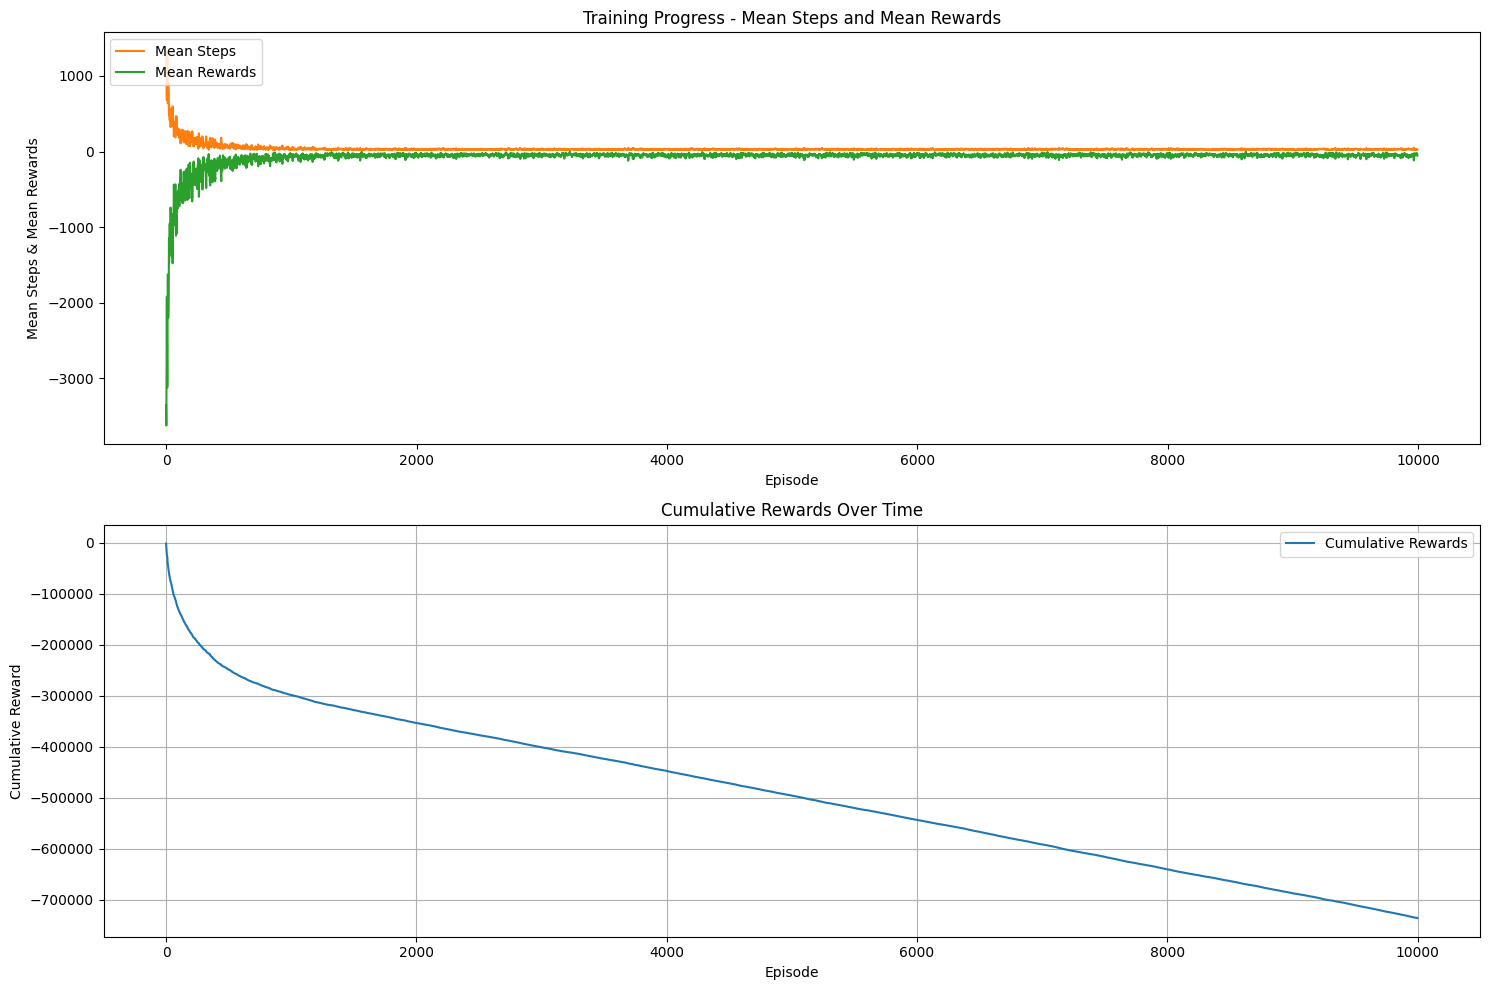

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Q-table saved to Google Drive at /content/drive/MyDrive/q_table_2024-11-02_15-53-48.npy
Q-table also saved to Google Drive as an Excel file at /content/drive/MyDrive/q_table_2024-11-02_15-53-48.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gym
from google.colab import drive, files
from datetime import datetime

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.8  # Discount factor
epsilon = 0.5  # Exploration factor

# Tracking metrics for plotting
episode_durations = []
reward_in_episode = []
cumulative_reward = 0  # Initialize cumulative reward

# Moving average function
def moving_average(data, periods=5):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[periods:] - cumsum[:-periods]) / periods if len(data) >= periods else data

# Function to plot mean steps, mean rewards, and cumulative rewards over time
def plot_metrics(episode_durations, reward_in_episode):
    cumulative_rewards = np.cumsum(reward_in_episode)  # Cumulative rewards starting from zero

    # Clear previous plot to prevent overlay issues
    plt.close()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot mean steps and mean rewards
    ax1.set_title('Training Progress - Mean Steps and Mean Rewards')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Mean Steps & Mean Rewards')
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    ax1.plot(mean_steps, label="Mean Steps", color="C1")
    ax1.plot(mean_reward, label="Mean Rewards", color="C2")
    ax1.legend(loc="upper left")

    # Plot cumulative rewards over time
    ax2.set_title("Cumulative Rewards Over Time")
    ax2.plot(cumulative_rewards, label="Cumulative Rewards", color="C0")
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Cumulative Reward")
    ax2.legend()
    ax2.grid(True)

    # Display the final figure
    plt.tight_layout()
    plt.show()

# Training loop
for i in range(1, 10000):
    state = env.reset()  # Reset the environment and get the initial state
    epochs, penalties, total_reward = 0, 0, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties and rewards
        if reward == -10:
            penalties += 1
        total_reward += reward

        # Move to the next state
        state = next_state
        epochs += 1

    # Record metrics per episode
    episode_durations.append(epochs)
    reward_in_episode.append(total_reward)
    cumulative_reward += total_reward  # Update cumulative reward

    # Print detailed progress for each episode
    print(f"Episode: {i}, Total Reward: {total_reward}, Cumulative Reward: {cumulative_reward}, Steps: {epochs}, Penalties: {penalties}")

print("Training finished.\n")

# Final plot after all episodes are completed
plot_metrics(episode_durations, reward_in_episode)

# Get the current time and date for filename
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Mount Google Drive
drive.mount('/content/drive')

# Save the Q-table as a .npy file with a timestamped filename
filename_npy = f'/content/drive/MyDrive/q_table_{timestamp}.npy'
np.save(filename_npy, q_table)
print(f"Q-table saved to Google Drive at {filename_npy}")

# Convert Q-table to DataFrame for saving as an Excel file
q_table_df = pd.DataFrame(q_table)

# Save the Q-table as an Excel file
filename_excel = f'/content/drive/MyDrive/q_table_{timestamp}.xlsx'
q_table_df.to_excel(filename_excel, index=False)
print(f"Q-table also saved to Google Drive as an Excel file at {filename_excel}")

# Optionally, download both files to your local machine
files.download(filename_npy)
files.download(filename_excel)


Q table

In [ ]:
q_table[253]

array([ -2.85251635,  -2.85251635,  -1.6445568 ,  -2.85251635,
       -11.31564544, -11.31564544])

**Use the trained data from my Google Colab**

This code allows a trained **Q-learning agent** to demonstrate its learned policy in the Taxi-v3 environment by loading a pre-trained Q-table. The agent uses the Q-table to select actions that maximize expected rewards based on prior learning. Each action is displayed step-by-step, giving a visual insight into the agent’s decision-making process. This code is useful for observing how well the agent performs after training and visualizing its performance in real time.

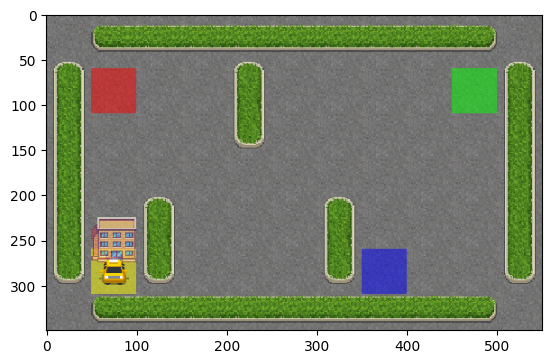

In [ ]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
import time
import numpy as np
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/Q_table_2024-11-01_16-34-40.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment and get the initial state
state = env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment using the trained Q-table
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    state, reward, done, info = env.step(action)

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()


**Checking the result through frames**

This code provides a step-by-step textual visualization of the agent's actions in the Taxi-v3 environment using a **trained Q-learning policy**. By loading a Q-table, the agent selects optimal actions based on learned Q-values, and key elements in the environment are color-coded for clarity. The display shows each action's effects, including state transitions, rewards, penalties, and Q-values, making it a useful tool for understanding the agent’s behavior and decision-making process in a textual format.

In [ ]:
import warnings
import gym
import numpy as np
from google.colab import drive
from time import sleep
import re

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-28_20-04-18.npy')  # Replace with the correct file name

# Initialize the Taxi environment with render_mode set to 'ansi'
env = gym.make('Taxi-v3', render_mode='ansi')

# Define color codes
YELLOW = "\033[93m"
BLUE = "\033[94m"
PINK = "\033[95m"
RESET = "\033[0m"

# Function to clean and colorize the rendered output
def colorize_render_output(rendered_text):
    # Combine list into a string if necessary
    if isinstance(rendered_text, list):
        rendered_text = ''.join(rendered_text)

    # Colorize the taxi, pickup, and drop-off points
    rendered_text = rendered_text.replace("Y", f"{YELLOW}Y{RESET}")  # Taxi position in yellow
    rendered_text = rendered_text.replace("R", f"{BLUE}R{RESET}")    # Pickup point in blue
    rendered_text = rendered_text.replace("G", f"{PINK}G{RESET}")    # Drop-off point in pink
    return rendered_text

# Reset the environment and get the initial state
state = env.reset()

# Loop through steps of the environment using the trained Q-table
penalties = 0
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    best_action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result in a single variable
    step_result = env.step(best_action)

    # Render the environment and colorize it for display
    rendered_text = env.render()  # Render with ANSI formatting
    colorized_text = colorize_render_output(rendered_text)  # Apply colors
    print(colorized_text)  # Display the colored environment

    # Display timestep information below each frame without clearing previous ones
    print(f"Timestep: {i + 1}")
    print(f"State: {state}")
    print(f"Action: {best_action}")
    print(f"Reward: {step_result[1]}")
    print(f"Penalties: {penalties}")
    print(f"Best action for State {state}: Action {best_action} (Q-value: {q_table[state][best_action]})")
    print(f"Next State: {step_result[0]}, Reward: {step_result[1]}, Done: {step_result[2]}, Info: {step_result[3]}")
    print("=" * 40)  # Divider between frames

    # Track penalties
    if step_result[1] == -10:
        penalties += 1

    # Move to the next state
    state = step_result[0]

    # Break if the episode is done
    if step_result[2]:  # done
        break

    sleep(1)  # Set delay to 1 second

# Close the environment
env.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 1
State: 214
Action: 2
Reward: -1
Penalties: 0
Best action for State 214: Action 2 (Q-value: -3.625610465280012)
Next State: 234, Reward: -1, Done: False, Info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 2
State: 234
Action: 2
Reward: -1
Penalties: 0
Best action for State 234: Action 2 (Q-value: -3.282013081600013)
Next State: 254, Reward: -1, Done: False, Info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)}
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Timestep: 3
State: 254
Act

**Display the current State code**
This code is designed to interpret and display the meaning of a specific state in the Taxi-v3 environment, which helps to understand the context of encoded states. By decoding a state, the code reveals the spatial configuration and goals within the environment, such as where the taxi and passenger are located and where the passenger needs to go. This functionality is useful for analyzing and debugging states in reinforcement learning applications involving grid-based environments like Taxi-v3.

In [ ]:
import gym

# Initialize the environment
env = gym.make('Taxi-v3')

# Decode state 253
state = 253
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)

# Map location indices to descriptions
locations = {0: "Red (R)", 1: "Green (G)", 2: "Yellow (Y)", 3: "Blue (B)"}

# Interpret decoded values
taxi_position = (taxi_row, taxi_col)
passenger_location = locations[pass_idx] if pass_idx in locations else "In Taxi"
destination_location = locations[dest_idx]

# Display the results
print(f"Decoded State {state}:")
print(f"  Taxi Position: {taxi_position}")
print(f"  Passenger Location: {passenger_location}")
print(f"  Destination Location: {destination_location}")


Decoded State 253:
  Taxi Position: (2, 2)
  Passenger Location: Blue (B)
  Destination Location: Green (G)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**Display the trained Q Learning on a single frame per second**

This code leverages a Q-learning policy saved in a Q-table to visualize the agent’s behavior in a grid-based Taxi environment. It dynamically selects the optimal action at each step based on the Q-values, showing how the agent navigates to complete its task. Each frame provides a comprehensive view of the agent's progress, including the current state, action, reward, and cumulative penalties, helping users observe and evaluate the learned policy in a step-by-step manner. This visualization is beneficial for understanding the agent's performance and the effectiveness of the learned Q-values

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gym
import time
import numpy as np
from google.colab import drive
from time import sleep

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-28_20-04-18.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Function to display the frames with Q-values, updating in-place
def print_frames(frames, q_table):
    for i, frame in enumerate(frames):
        clear_output(wait=True)  # Clear previous frame
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")
        print(f"Best action for State {frame['state']}: Action {frame['action']} (Q-value: {q_table[frame['state']][frame['action']]})")
        sleep(1)  # Set delay to 1 second

# Reset the environment and get the initial state
state = env.reset()

# Store frames for rendering
frames = []

# Loop through steps of the environment using the trained Q-table
penalties = 0
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    best_action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    next_state, reward, done, info = env.step(best_action)

    # Track penalties
    if reward == -10:
        penalties += 1

    # Store the frame information with updated state and best action for each step
    frames.append({
        'frame': env.render(mode='ansi'),  # Render as text
        'state': state,
        'action': best_action,
        'reward': reward,
        'penalties': penalties
    })

    # Move to the next state
    state = next_state

    # Break if the episode is done
    if done:
        break

# Output the frames with the trained data and 1-second delay between frames
print_frames(frames, q_table)

# Close the environment
env.close()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 18
State: 16
Action: 5
Reward: 20
Penalties: 0
Best action for State 16: Action 5 (Q-value: 19.99999999999999)


**Comparing the Q learning Agent versus the "Random Policy" and "Heuistic Policy"**

This code evaluates and compares three different policies for the Taxi-v3 environment. By observing metrics over multiple episodes, it provides insight into how effective each policy is at achieving the task. The Q-learning policy uses learned values to optimize actions, the random policy serves as a baseline, and the heuristic policy provides a rule-based alternative. This allows for a side-by-side performance analysis to validate the Q-learning policy against simpler or untrained approaches.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-22_15-01-33.npy')  # Update the path as needed

# Initialize the environment
env = gym.make('Taxi-v3')

# Define evaluation function
def evaluate_policy(policy, episodes=100):
    total_epochs, total_penalties, total_rewards = 0, 0, []

    for ep in range(episodes):
        if ep % 10 == 0:
            print(f"Evaluating episode {ep + 1}/{episodes}")

        state = env.reset()  # Reset the environment (no unpacking)
        epochs, penalties, episode_reward = 0, 0, 0
        done = False

        while not done:
            action = policy(state)
            # Remove `truncated` if not supported
            state, reward, done, info = env.step(action)
            if reward == -10:
                penalties += 1
            episode_reward += reward
            epochs += 1

        total_rewards.append(episode_reward)
        total_penalties += penalties
        total_epochs += epochs

    avg_timesteps = total_epochs / episodes
    avg_penalties = total_penalties / episodes
    avg_reward = sum(total_rewards) / episodes
    return avg_timesteps, avg_penalties, avg_reward

# 1. Q-learning Agent Policy
def q_learning_policy(state):
    return np.argmax(q_table[state])

# 2. Random Policy
def random_policy(state):
    return env.action_space.sample()

# 3. Heuristic-Based Policy
def heuristic_policy(state):
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)

    # Move towards the passenger if not in taxi
    if pass_idx < 4:
        if (taxi_row, taxi_col) != env.locs[pass_idx]:
            if taxi_row > env.locs[pass_idx][0]:
                return 0  # south
            elif taxi_row < env.locs[pass_idx][0]:
                return 1  # north
            elif taxi_col > env.locs[pass_idx][1]:
                return 3  # west
            elif taxi_col < env.locs[pass_idx][1]:
                return 2  # east
        else:
            return 4  # pickup

    # Move towards the destination if passenger is in taxi
    else:
        if (taxi_row, taxi_col) != env.locs[dest_idx]:
            if taxi_row > env.locs[dest_idx][0]:
                return 0  # south
            elif taxi_row < env.locs[dest_idx][0]:
                return 1  # north
            elif taxi_col > env.locs[dest_idx][1]:
                return 3  # west
            elif taxi_col < env.locs[dest_idx][1]:
                return 2  # east
        else:
            return 5  # dropoff

# Evaluate each policy
episodes = 100
q_learning_results = evaluate_policy(q_learning_policy, episodes)
random_results = evaluate_policy(random_policy, episodes)
heuristic_results = evaluate_policy(heuristic_policy, episodes)

# Print comparison results
print("Performance over 100 episodes:")
print(f"Q-Learning Policy: Avg Timesteps: {q_learning_results[0]}, Avg Penalties: {q_learning_results[1]}, Avg Reward: {q_learning_results[2]}")
print(f"Random Policy: Avg Timesteps: {random_results[0]}, Avg Penalties: {random_results[1]}, Avg Reward: {random_results[2]}")
print(f"Heuristic Policy: Avg Timesteps: {heuristic_results[0]}, Avg Penalties: {heuristic_results[1]}, Avg Reward: {heuristic_results[2]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Evaluating episode 1/100
Evaluating episode 11/100
Evaluating episode 21/100
Evaluating episode 31/100
Evaluating episode 41/100
Evaluating episode 51/100
Evaluating episode 61/100
Evaluating episode 71/100
Evaluating episode 81/100
Evaluating episode 91/100
Evaluating episode 1/100
Evaluating episode 11/100
Evaluating episode 21/100
Evaluating episode 31/100
Evaluating episode 41/100
Evaluating episode 51/100
Evaluating episode 61/100
Evaluating episode 71/100
Evaluating episode 81/100
Evaluating episode 91/100
Evaluating episode 1/100
Evaluating episode 11/100
Evaluating episode 21/100
Evaluating episode 31/100
Evaluating episode 41/100
Evaluating episode 51/100
Evaluating episode 61/100
Evaluating episode 71/100
Evaluating episode 81/100
Evaluating episode 91/100
Performance over 100 episodes:
Q-Learning Policy: Avg Timesteps: 12.69, Avg Penalties: 0.0, Av

### **Deep Q-Network (DQN) Agent for Taxi-v3 Environment**

This code trains a **Deep Q-Learning agent** to navigate and optimize its performance in the Taxi-v3 environment, aiming to pick up and drop off passengers efficiently. The TrainingAgent class handles action selection, model updates, and Q-learning with experience replay to improve the agent's decision-making. Additionally, it logs the average steps, rewards, and cumulative rewards per episode, providing visual insights into the training progress. The final trained model and performance plots are saved to Google Drive. This implementation can be expanded for various configurations, allowing flexibility in DQN architecture, hyperparameters, and training settings.



In [ ]:
import os
import sys
import gym
import time
import numpy as np
import pandas as pd
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from google.colab import drive
from datetime import datetime
from itertools import count
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay  # For Colab/Jupyter display updates


# Mount Google Drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay  # For Colab/Jupyter display updates

# Function to compute a moving average
def moving_average(data, periods=5):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[periods:] - cumsum[:-periods]) / periods if len(data) >= periods else data

# Function to plot mean steps, mean rewards, and cumulative rewards over time
def plot_metrics(episode_durations, reward_in_episode):
    cumulative_rewards = np.cumsum(reward_in_episode)  # Cumulative rewards starting from zero

    # Close any open figures to prevent overlay issues in Colab/Jupyter
    plt.close()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot mean steps and mean rewards
    ax1.set_title('Training Progress - Mean Steps and Mean Rewards')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Mean Steps & Mean Rewards')
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    ax1.plot(mean_steps, label="Mean Steps", color="C1")
    ax1.plot(mean_reward, label="Mean Rewards", color="C2")
    ax1.legend(loc="upper left")

    # Plot cumulative rewards over time
    ax2.set_title("Cumulative Rewards Over Time")
    ax2.plot(cumulative_rewards, label="Cumulative Rewards", color="C0")
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Cumulative Reward")
    ax2.legend()
    ax2.grid(True)

    # Display the figure once
    plt.show()
# Define DQN Models
class DQN(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN, self).__init__()
        self.emb = nn.Embedding(input, 4)
        self.l1 = nn.Linear(4, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

class DQN_2(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN_2, self).__init__()
        self.emb = nn.Embedding(input, 6)
        self.l1 = nn.Linear(6, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, 100)
        self.l4 = nn.Linear(100, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x

# Define Transition for Replay Memory
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ReplayMemory:
    def __init__(self, capacity: int):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        """Saves a transition."""
        self.memory.append(Transition(*args))

    def sample(self, batch_size: int):
        """Samples a batch of transitions."""
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

class TrainingAgent():
    def __init__(self,
                 env=gym.make("Taxi-v3").env,
                 batch_size: int = 128,
                 gamma: float = 0.99,
                 eps_start: float = 1,
                 eps_end: float = 0.1,
                 eps_decay: float = 400,
                 target_update: int = 20,
                 max_steps_per_episode: int = 100,
                 warmup_episode: int = 10,
                 save_freq: int = 1000,
                 lr: float = 0.001,
                 lr_min: float = 0.0001,
                 lr_decay: int = 5000,
                 memory_size: int = 50000,
                 num_episodes: int = 10000,
                 name: str = None,
                 architecture: int = 2,
                 save: bool = True) -> None:

        self.config = {
            "BATCH_SIZE": batch_size,
            "GAMMA": gamma,
            "EPS_START": eps_start,
            "EPS_END": eps_end,
            "EPS_DECAY": eps_decay,
            "TARGET_UPDATE": target_update,
            "MAX_STEPS_PER_EPISODE": max_steps_per_episode,
            "WARMUP_EPISODE": warmup_episode,
            "SAVE_FREQ": save_freq,
            "LR": lr,
            "LR_MIN": lr_min,
            "LR_DECAY": lr_decay,
            "MEMORY_SIZE": memory_size,
            "NUM_EPISODES": num_episodes,
            "SHOULD_WARMUP": True
        }

        self.save_fig = save
        self.episode_durations = []
        self.reward_in_episode = []
        self.epsilon_vec = []

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.env = env
        self.id = int(time.time()) if name is None else name
        self.rng = np.random.default_rng(123)
        self.architecture = architecture
        self.memory = ReplayMemory(self.config["MEMORY_SIZE"])

    def print_model_info(self) -> None:
        print("Model Initialized with params:")
        for key, value in self.config.items():
            print(f" - {key}: {value}")

    def compile(self) -> None:
        n_actions = self.env.action_space.n
        n_observations = self.env.observation_space.n
        self.model = DQN(n_observations, n_actions).to(self.device) if self.architecture == 1 else DQN_2(n_observations, n_actions).to(self.device)
        self.target_model = DQN(n_observations, n_actions).to(self.device) if self.architecture == 1 else DQN_2(n_observations, n_actions).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.target_model.eval()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.config["LR"])

    def _get_epsilon(self, episode: int) -> float:
        epsilon = self.config["EPS_END"] + (self.config["EPS_START"] - self.config["EPS_END"]) * np.exp(-episode / self.config["EPS_DECAY"])
        return epsilon

    def _get_action_for_state(self, state: int):
        with torch.no_grad():
            predicted = self.model(torch.tensor([state], device=self.device))
            action = predicted.max(1)[1]
        return action.item()

    def _choose_action(self, state: int, epsilon: float) -> int:
        if self.rng.uniform() < epsilon:
            action = self.env.action_space.sample()
        else:
            action = self._get_action_for_state(state)
        return action

    def _remember(self, state: int, action: int, next_state: int, reward: int, done: bool) -> None:
        self.memory.push(torch.tensor([state], device=self.device), torch.tensor([action], device=self.device, dtype=torch.long), torch.tensor([next_state], device=self.device), torch.tensor([reward], device=self.device), torch.tensor([done], device=self.device, dtype=torch.bool))

    def _train_model(self) -> None:
        if len(self.memory) < self.config["BATCH_SIZE"]:
            return
        transitions = self.memory.sample(self.config["BATCH_SIZE"])
        batch = Transition(*zip(*transitions))

        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)
        reward_batch = torch.cat(batch.reward)
        next_state_batch = torch.cat(batch.next_state)
        done_batch = torch.cat(batch.done)

        predicted_q_value = self.model(state_batch).gather(1, action_batch.unsqueeze(1))
        next_state_values = self.target_model(next_state_batch).max(1)[0]
        expected_q_values = (~done_batch * next_state_values * self.config["GAMMA"]) + reward_batch

        loss = F.smooth_l1_loss(predicted_q_value, expected_q_values.unsqueeze(1))

        self.optimizer.zero_grad()
        loss.backward()
        for param in self.model.parameters():
            param.grad.data.clamp_(-1, 1)

        self.optimizer.step()

    def _update_target(self) -> None:
        self.target_model.load_state_dict(self.model.state_dict())

    def fit(self) -> None:
        episode_done = len(self.episode_durations)
        epsilon = 1 if self.config["SHOULD_WARMUP"] else self.epsilon_vec[-1]
        start = time.time()
        cumulative_reward = 0  # Initialize cumulative reward outside the loop

        for i_episode in range(self.config["NUM_EPISODES"] - episode_done):
            state = self.env.reset()
            reward_in_episode = 0  # Reset the reward for the episode here

            if i_episode >= self.config["WARMUP_EPISODE"] and self.config["SHOULD_WARMUP"]:
                epsilon = self._get_epsilon(i_episode - self.config["WARMUP_EPISODE"])
            elif not self.config["SHOULD_WARMUP"]:
                epsilon = self._get_epsilon(len(self.episode_durations) - self.config["WARMUP_EPISODE"])

            for step in count():
                action = self._choose_action(state, epsilon)

                # Unpack the values based on the expected return format
                result = self.env.step(action)  # Capture next_state, reward, done, and any additional info

                # Unpack based on the number of values returned
                if len(result) == 4:
                    next_state, reward, done, _ = result  # 4 values
                elif len(result) == 5:
                    next_state, reward, done, _, _ = result  # 5 values
                elif len(result) == 3:
                    next_state, reward, done = result  # 3 values
                else:
                    raise ValueError(f"Unexpected number of values returned by env.step: {len(result)}")

                self._remember(state, action, next_state, reward, done)

                if i_episode >= self.config["WARMUP_EPISODE"] or not self.config["SHOULD_WARMUP"]:
                    self._train_model()

                state = next_state
                reward_in_episode += reward

                if done:
                    self.episode_durations.append(step + 1)
                    self.reward_in_episode.append(reward_in_episode)  # Store the total reward for this episode
                    self.epsilon_vec.append(epsilon)

                    # Update cumulative reward with the reward for this episode
                    cumulative_reward += reward_in_episode

                    # Print the metrics at the end of the episode, including cumulative rewards
                    print(f"Episode: {i_episode + 1}, Total Reward: {reward_in_episode}, Cumulative Reward: {cumulative_reward}, Steps: {step + 1}, Epsilon: {epsilon:.2f}")

                    break

            if i_episode % self.config["TARGET_UPDATE"] == 0:
                self._update_target()

            if i_episode % self.config["SAVE_FREQ"] == 0:
                self.save()


        # Plot metrics after training completes
        plot_metrics(self.episode_durations, self.reward_in_episode)
        self.save()

    def save(self) -> None:
        current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
        model_name = f"DQN_{current_time}_taxi_v3.pt"
        model_path = f"/content/drive/My Drive/{model_name}"

        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            "reward_in_episode": self.reward_in_episode,
            "episode_durations": self.episode_durations,
            "epsilon_vec": self.epsilon_vec,
            "config": self.config,
            "architecture": self.architecture
        }, model_path)
        print(f"Model saved to {model_path}")

# Initialize and run the agent
if __name__ == "__main__":
    env = gym.make("Taxi-v3", new_step_api=True).env
    batch_size = 128
    gamma = 0.99
    eps_start = 1.0
    eps_end = 0.1
    eps_decay = 400
    target_update = 20
    max_steps_per_episode = 100
    warmup_episode = 10
    save_freq = 1000
    lr = 0.001
    lr_min = 0.0001
    lr_decay = 5000
    memory_size = 50000
    num_episodes = 10000
    architecture = 2

    agent = TrainingAgent(env=env,
                          batch_size=batch_size,
                          gamma=gamma,
                          eps_start=eps_start,
                          eps_end=eps_end,
                          eps_decay=eps_decay,
                          target_update=target_update,
                          max_steps_per_episode=max_steps_per_episode,
                          warmup_episode=warmup_episode,
                          save_freq=save_freq,
                          lr=lr,
                          lr_min=lr_min,
                          lr_decay=lr_decay,
                          memory_size=memory_size,
                          num_episodes=num_episodes,
                          architecture=architecture)

    agent.compile()
    agent.print_model_info()
    agent.fit()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Initialized with params:
 - BATCH_SIZE: 128
 - GAMMA: 0.99
 - EPS_START: 1.0
 - EPS_END: 0.1
 - EPS_DECAY: 400
 - TARGET_UPDATE: 20
 - MAX_STEPS_PER_EPISODE: 100
 - WARMUP_EPISODE: 10
 - SAVE_FREQ: 1000
 - LR: 0.001
 - LR_MIN: 0.0001
 - LR_DECAY: 5000
 - MEMORY_SIZE: 50000
 - NUM_EPISODES: 10000
 - SHOULD_WARMUP: True
Episode: 1, Total Reward: -18835, Cumulative Reward: -18835, Steps: 4771, Epsilon: 1.00
Model saved to /content/drive/My Drive/DQN_20241102-194915_taxi_v3.pt
Episode: 2, Total Reward: -5496, Cumulative Reward: -24331, Steps: 1395, Epsilon: 1.00
Episode: 3, Total Reward: -8548, Cumulative Reward: -32879, Steps: 2260, Epsilon: 1.00
Episode: 4, Total Reward: -15244, Cumulative Reward: -48123, Steps: 3907, Epsilon: 1.00
Episode: 5, Total Reward: -4127, Cumulative Reward: -52250, Steps: 1034, Epsilon: 1.00
Episode: 6, Total Reward: -9751, Cumul

**Deploying a Trained Deep Q-Learning (DQN) Model to Play Taxi-v3**


This code demonstrates how to deploy a pre-trained DQN model for real-time interaction in the Taxi-v3 environment. It loads the model from Google Drive, initiates the environment, and performs inference to select optimal actions at each timestep. Using a custom play() function, it visualizes the environment state at each step, allowing users to observe the agent’s decisions in real-time as it navigates the gridworld to pick up and drop off passengers efficiently. The code serves as a complete deployment pipeline for visualizing a trained DQN model in action.

Total Reward: 8


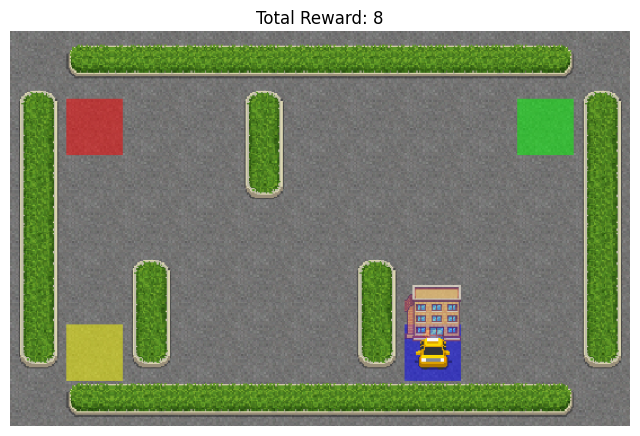

In [30]:
import os
import sys
import gym
import time
import numpy as np
import pandas as pd
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from google.colab import drive
from IPython import display as ipythondisplay

# Mount Google Drive
drive.mount('/content/drive')

# Define DQN Models
class DQN(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN, self).__init__()
        self.emb = nn.Embedding(input, 4)
        self.l1 = nn.Linear(4, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

class DQN_2(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN_2, self).__init__()
        self.emb = nn.Embedding(input, 6)
        self.l1 = nn.Linear(6, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, 100)
        self.l4 = nn.Linear(100, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x

# Define Transition for Replay Memory
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ReplayMemory:
    def __init__(self, capacity: int):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        """Saves a transition."""
        self.memory.append(Transition(*args))

    def sample(self, batch_size: int):
        """Samples a batch of transitions."""
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Load a specific trained model
def import_model(path: str) -> tuple:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    checkpoint = torch.load(path)

    n_actions = env.action_space.n
    n_observation = env.observation_space.n

    # Select model architecture based on the checkpoint
    if checkpoint.get("architecture") == 1:
        model = DQN(n_observation, n_actions).to(device)
    else:
        model = DQN_2(n_observation, n_actions).to(device)

    optimizer = optim.Adam(model.parameters())

    # Load the state dict into the model
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return optimizer, model, device

# Function to get action for state
def get_action_for_state(state: int, model, device) -> int:
    with torch.no_grad():
        predicted = model(torch.tensor([state], device=device))
        action = predicted.max(1)[1]
    return action.item()

# Function to play the game with the loaded model and display it on a single frame
def play(env, model, device, max_steps=100, render=True):
    state = env.reset()
    done = False
    total_reward = 0

    # Initialize the figure for displaying frames
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(figsize=(8, 8))

    while not done and total_reward < max_steps:
        action = get_action_for_state(state, model, device)
        state, reward, done, _ = env.step(action)  # Adjust based on your version of gym
        total_reward += reward

        # Render the frame
        screen = env.render(mode='rgb_array')

        # Display the frame using Matplotlib
        ax.clear()
        ax.imshow(screen)
        ax.axis('off')  # Hide the axes
        plt.title(f'Total Reward: {total_reward}')
        ipythondisplay.clear_output(wait=True)  # Clear previous frame
        ipythondisplay.display(plt.gcf())  # Display the current frame

        # Add a small delay between frames (0.1 seconds)
        time.sleep(1)

    # Clear the output to remove the last frame display
    ipythondisplay.clear_output(wait=True)  # Clear output once more to avoid final frame lingering
    #plt.close(fig)  # Close the figure window
    return total_reward

# Initialize and run the agent
if __name__ == "__main__":
    # Set the path to your saved model
    model_path = "/content/drive/My Drive/DQN_20241102-141956_taxi_v3.pt"  # Change to your actual path

    # Create the environment
    env = gym.make("Taxi-v3").env

    # Load the model
    optimizer, model, device = import_model(model_path)

    # Play the game with the loaded model
    total_reward = play(env, model, device, max_steps=100, render=True)
    print(f"Total Reward: {total_reward}")


**SARSA (State-Action-Reward-State-Action) algorithm**

This SARSA-based training code applies on-policy learning to improve an agent’s behavior in the Taxi-v3 environment. By following a policy-driven update rule and leveraging epsilon-greedy exploration, it learns an effective policy to maximize rewards. The training progress is visualized through plots of mean steps, rewards, and cumulative rewards, all of which are saved to Google Drive for analysis. This script provides a comprehensive setup for training, evaluating, and visualizing SARSA in a reinforcement learning setting.


Strømmer utdata som er avkortet til de siste 5000 linjene.
Episode: 5001, Total Reward: 13, Cumulative Reward: -67136, Steps: 8, Epsilon: 0.00
Episode: 5002, Total Reward: -1, Cumulative Reward: -67137, Steps: 22, Epsilon: 0.00
Episode: 5003, Total Reward: 8, Cumulative Reward: -67129, Steps: 13, Epsilon: 0.00
Episode: 5004, Total Reward: 5, Cumulative Reward: -67124, Steps: 16, Epsilon: 0.00
Episode: 5005, Total Reward: 1, Cumulative Reward: -67123, Steps: 20, Epsilon: 0.00
Episode: 5006, Total Reward: 9, Cumulative Reward: -67114, Steps: 12, Epsilon: 0.00
Episode: 5007, Total Reward: 14, Cumulative Reward: -67100, Steps: 7, Epsilon: 0.00
Episode: 5008, Total Reward: 4, Cumulative Reward: -67096, Steps: 17, Epsilon: 0.00
Episode: 5009, Total Reward: 4, Cumulative Reward: -67092, Steps: 17, Epsilon: 0.00
Episode: 5010, Total Reward: 5, Cumulative Reward: -67087, Steps: 16, Epsilon: 0.00
Episode: 5011, Total Reward: 11, Cumulative Reward: -67076, Steps: 10, Epsilon: 0.00
Episode: 5012, 

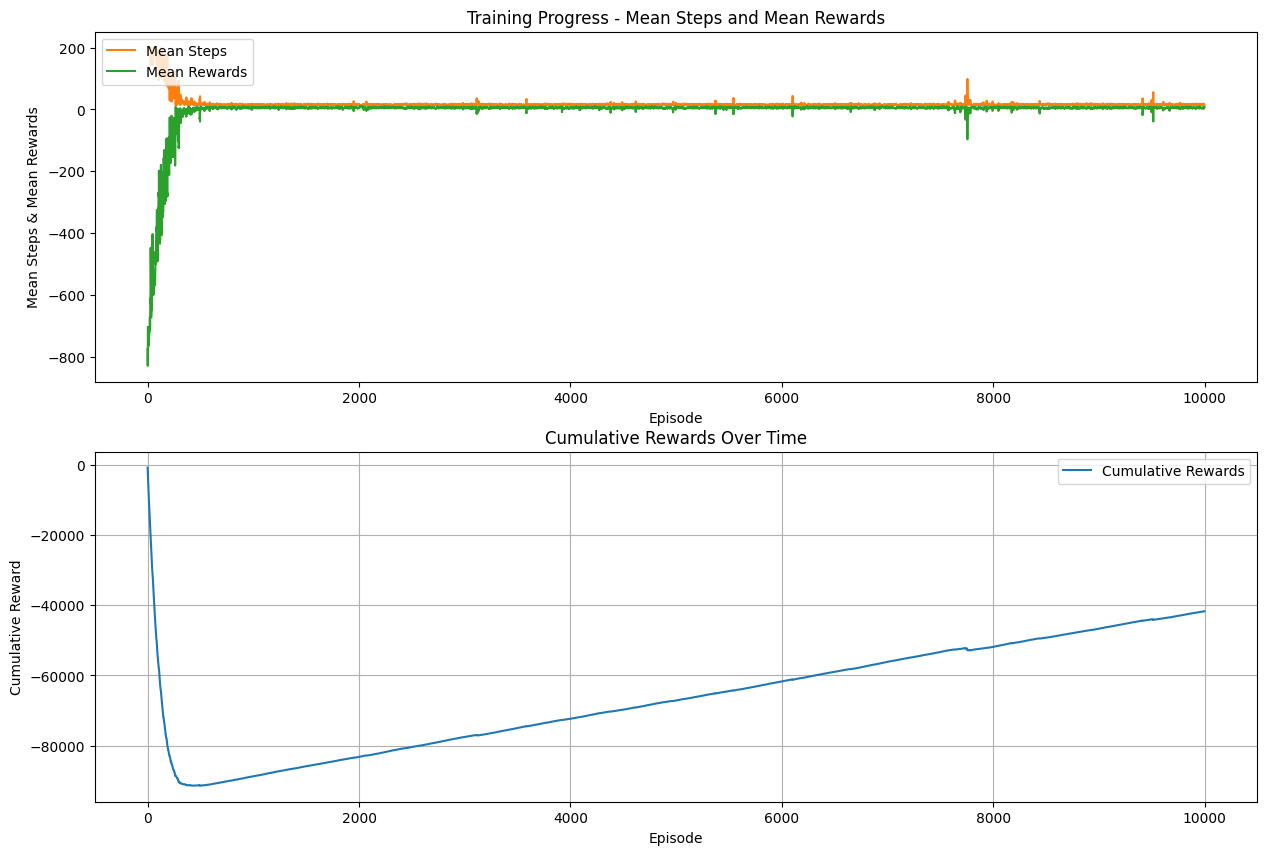


2024-11-02 15:47:06.840279 - Training Ended
Mean Reward: -4.1713
Time to train: 
    - 9.02s
    - 0.15min
    - 0.0h
Mean Time Per Episode: 0.000902
Q-table saved to /content/drive/MyDrive/qtable.npy
Training graph saved to /content/drive/MyDrive/SARSA_graph.png


(9.02, -4.1713)

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import time
import gym
from IPython import display as ipythondisplay
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to calculate moving average
def moving_average(x: list, periods: int = 5) -> list:
    if len(x) < periods:
        return x
    cumsum = np.cumsum(np.insert(x, 0, 0))
    res = (cumsum[periods:] - cumsum[:-periods]) / periods
    return np.hstack([x[:periods - 1], res])

# Function to plot mean steps, mean rewards, and cumulative rewards over time
def plot_metrics(episode_durations, reward_in_episode):
    cumulative_rewards = np.cumsum(reward_in_episode)

    # Close any open figures to prevent overlay issues in Colab/Jupyter
    plt.close()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot mean steps and mean rewards
    ax1.set_title('Training Progress - Mean Steps and Mean Rewards')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Mean Steps & Mean Rewards')
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    ax1.plot(mean_steps, label="Mean Steps", color="C1")
    ax1.plot(mean_reward, label="Mean Rewards", color="C2")
    ax1.legend(loc="upper left")

    # Plot cumulative rewards over time
    ax2.set_title("Cumulative Rewards Over Time")
    ax2.plot(cumulative_rewards, label="Cumulative Rewards", color="C0")
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Cumulative Reward")
    ax2.legend()
    ax2.grid(True)

    # Display the figure once
    plt.show()

# Train function
def train(env=gym.make("Taxi-v3"),
          episodes=2000,
          gamma=0.95,
          epsilon=1,
          max_epsilon=1,
          min_epsilon=0.001,
          epsilon_decay=0.01,
          alpha=0.85,
          path_table: str = "/content/drive/MyDrive/qtable.npy",
          path_graph: str = "/content/drive/MyDrive/SARSA_graph.png"):
    start_date = datetime.now()
    start_time = time.time()
    total_reward = []
    steps_per_episode = []
    epsilon_vec = []
    cumulative_reward = 0  # Initialize cumulative reward

    Q = np.zeros((env.observation_space.n, env.action_space.n))

    print("{} - Starting Training...\n".format(start_date))

    for e in range(episodes):
        done = False
        total_reward.append(0)
        steps_per_episode.append(0)
        state1 = env.reset()

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay * e)
        epsilon_vec.append(epsilon)

        if np.random.uniform(0, 1) < epsilon:
            action1 = env.action_space.sample()
        else:
            action1 = np.argmax(Q[state1, :])

        while not done:
            state2, reward, done, _ = env.step(action1)
            total_reward[e] += reward
            steps_per_episode[e] += 1
            if np.random.uniform(0, 1) < epsilon:
                action2 = env.action_space.sample()
            else:
                action2 = np.argmax(Q[state2, :])

            predict = Q[state1, action1]
            target = reward + gamma * Q[state2, action2]
            Q[state1, action1] += alpha * (target - predict)

            state1 = state2
            action1 = action2

        # Update cumulative reward
        cumulative_reward += total_reward[e]

        # Print episode details
        print(f"Episode: {e + 1}, Total Reward: {total_reward[e]}, Cumulative Reward: {cumulative_reward}, Steps: {steps_per_episode[e]}, Epsilon: {epsilon:.2f}")

    # Final plot after all episodes are completed
    plot_metrics(steps_per_episode, total_reward)

    end_date = datetime.now()
    execution_time = (time.time() - start_time)
    print()
    print("{} - Training Ended".format(end_date))
    print("Mean Reward: {}".format(np.mean(total_reward)))
    print("Time to train: \n    - {}s\n    - {}min\n    - {}h".format(
        np.round(execution_time, 2), np.round(execution_time / 60, 2),
        np.round(execution_time / 3600, 2)))
    print("Mean Time Per Episode: {}".format(np.round(execution_time / len(total_reward), 6)))

    # Save the Q-table and graph
    np.save(path_table, Q)
    plt.savefig(path_graph)
    print(f"Q-table saved to {path_table}")
    print(f"Training graph saved to {path_graph}")

    return np.round(execution_time, 2), np.mean(total_reward)

# Set parameters for training
episodes = 10000
epsilon = 1
max_epsilon = 1
gamma = 0.99
min_epsilon = 0.001
epsilon_decay = 0.01
alpha = 0.85

# Create the environment
env = gym.make("Taxi-v3")

# Run training
train(env, episodes, gamma, epsilon, max_epsilon, min_epsilon, epsilon_decay, alpha)


***Evaluation and Visualization of SARSA Model Performance on Taxi-v3 Environment***

This code evaluates a SARSA-trained agent in the Taxi-v3 environment, visualizing its performance through real-time rendering of each step and calculating performance metrics. The play() function simulates one episode using the model's learned policy, while solve() and display_data() aggregate results over multiple episodes or a timed interval. With customizable parameters for rendering, execution speed, and loop count, this script provides a thorough setup for assessing a SARSA agent's effectiveness and efficiency in reaching goals, including summary statistics on steps taken, rewards earned, and overall success rate.

***How to use the script?***

Modifying the Code
Copy the following modified code that allows you to run the SARSA agent in Google Colab. This code includes the necessary adjustments to load the Q-table from your Google Drive.

`MODEL_PATH = "/content/drive/My Drive/SARSA_Taxi_v3_20241018_154311.npy  # Update the path to your file`


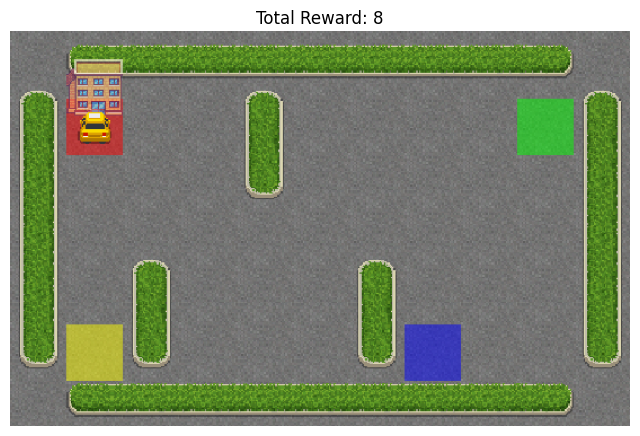

In [ ]:
import numpy as np
import random
import time
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Specify the path to your trained SARSA model file here
MODEL_PATH = "/content/drive/My Drive/SARSA_Taxi_v3_20241018_173225.npy"  # Update this path as needed

# Function to play the game
def play(path: str = MODEL_PATH,  # Use the specified model path
         slow: bool = False,
         render: bool = True,
         is_loop: bool = False,
         is_time: bool = False):
    env = gym.make("Taxi-v3")
    q_table = np.load(path)
    done = False
    result = 0
    state = env.reset()

    # Set up the figure for rendering
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(figsize=(8, 8))

    steps = 0

    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)

        result += reward
        state = next_state

        # Render the current frame
        screen = env.render(mode='rgb_array')

        # Display the frame using Matplotlib
        ax.clear()
        ax.imshow(screen)
        ax.axis('off')  # Hide the axes
        plt.title(f'Total Reward: {result}')
        ipythondisplay.clear_output(wait=True)  # Clear previous frame
        ipythondisplay.display(plt.gcf())  # Display the current frame

        steps += 1

        # Delay for 1 second per frame
        time.sleep(1)

        if steps >= 100:
            break

        if slow:
            input("Press anything to continue...")
            print("\r", end="\r")

    # Clear the output to remove the last frame display
    ipythondisplay.clear_output(wait=True)  # Clear output once more to avoid final frame lingering

    env.close()  # Close the environment
    return steps, result

# Function to display data
def display_data(total, total_failed, start, mean_steps, mean_result):
    print()
    print(
        "[{} LOOP DONE - {}% FAILED - {} SECONDS] - Mean Steps Per Loop: {} - Mean Reward Per Loop: {} - Mean Time Per Loop : {}"
        .format(total, np.round(total_failed / total * 100, 2),
                np.round(time.time() - start, 4),
                np.round(mean_steps / total, 2),
                np.round(mean_result / total, 2),
                np.round((time.time() - start) / total, 6)))

# Function to solve the game
def solve(path, slow, render, mean_steps, mean_result, total_failed, is_loop,
          is_time):
    steps, result = play(path=path,
                         slow=slow,
                         render=render,
                         is_loop=is_loop,
                         is_time=is_time)
    mean_steps += steps
    mean_result += result
    if steps >= 100:
        total_failed += 1

    return mean_steps, mean_result, total_failed

# User-defined parameters
# Modify these parameters as needed
slow = False         # Set to True for slow mode
render = True        # Set to True to render the state
loop_count = 1       # Number of times to play the game
time_limit = 0       # Run play for x seconds, set to 0 for no time limit

# Start timing
start = time.time()
mean_steps, mean_result = 0, 0
total_failed = 0
is_loop = True if loop_count != 1 else False
maxrt = datetime.timedelta(seconds=time_limit) if time_limit != 0 else None

if maxrt is not None:
    stop = datetime.datetime.now() + maxrt
    total = 0

    while datetime.datetime.now() < stop:
        mean_steps, mean_result, total_failed = solve(
            MODEL_PATH, slow, render, mean_steps, mean_result,
            total_failed, is_loop, True)
        total += 1

    display_data(total, total_failed, start, mean_steps, mean_result)
else:
    for l in range(loop_count):
        mean_steps, mean_result, total_failed = solve(
            MODEL_PATH, slow, render, mean_steps, mean_result,
            total_failed, is_loop, False)

    if is_loop:
        display_data(loop_count, total_failed, start, mean_steps,
                     mean_result)
